In [2]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
import  matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
nega=pd.read_csv("C:/Users/DELL/negative-words.txt", encoding='latin1',error_bad_lines=False)
nega

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [10]:
nega1 = nega.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 'x'})
nega1

,x
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [11]:
nega1 = [x.strip() for x in nega1.x] 
nega1 = [x for x in nega1 if x] 
nega1[0:10]  

[';',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."']

In [12]:
nlp =spacy.load('en_core_web_sm')

In [64]:
one_block = nega1[9]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 

In [15]:
one_block

';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."'

In [16]:
for token in doc_block[0:20]:
    print(token, token.pos_) 

; PUNCT
   SPACE
Minqing PROPN
Hu PROPN
and CCONJ
Bing PROPN
Liu PROPN
. PUNCT
" PUNCT
Mining NOUN
and CCONJ
Summarizing PROPN
Customer PROPN
Reviews PROPN
. PUNCT
" PUNCT


In [17]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25]) 

[]


In [18]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10] 

,word,count
0,mining,1


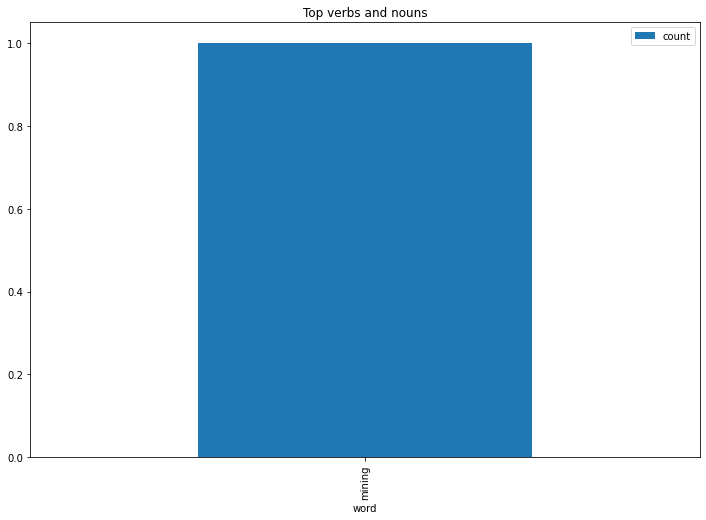

In [19]:
#Visualizing
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns') 

# Emotion mining

In [20]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [21]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [22]:
nega=pd.read_csv("C:/Users/DELL/negative-words.txt", encoding='latin1',error_bad_lines=False)
nega = nega.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 'x'})
nega

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,x
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [23]:
nega= [x.strip() for x in nega.x] 
nega = [x for x in nega if x] 

In [24]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(nega))
sentences[5:15] 

['The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion.',
 ';       See the paper below: ; ;       Bing Liu.',
 '"Sentiment Analysis and Subjectivity."',
 'An chapter in ; ;    2.',
 'You will notice many misspelled words in the list.',
 'They are not ;       mistakes.',
 'They are included as these misspelled words appear ;       frequently in social media content.',
 '; ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; 2-faced 2-faces abnormal abolish abominable abominably abominate abomination abort aborted aborts abrade abrasive abrupt abruptly abscond absence absent-minded absentee absurd absurdity absurdly absurdness abuse abused abuses abusive abysmal abysmally abyss accidental accost accursed accusation accusations accuse accuses accusing accusingly acerbate acerbic acerbically ache ached aches achey aching acrid acridly acridness acrimonious acrimoniously acrimo

In [25]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,; ; Opinion Lexicon: Negative ; ; This file co...
1,; ; This file and the papers can all be downlo...
2,"""Mining and Summarizing Customer Reviews."""
3,; Proceedings of the ACM SIGKDD Internat...
4,Proceedings of the 14th ; ; Notes: ; 1.
5,The appearance of an opinion word in a sentenc...
6,; See the paper below: ; ; Bing Liu.
7,"""Sentiment Analysis and Subjectivity."""
8,An chapter in ; ; 2.
9,You will notice many misspelled words in the l...


In [26]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [27]:
#calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [28]:
calculate_sentiment(text = 'amazing') 

4

In [29]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [30]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    19
1    22
2     5
3    17
4     9
5    23
6     9
7     4
8     6
9     9
Name: word_count, dtype: int64

In [31]:
sent_df

,sentence,sentiment_value,word_count
0,; ; Opinion Lexicon: Negative ; ; This file co...,-2,19
1,; ; This file and the papers can all be downlo...,0,22
2,"""Mining and Summarizing Customer Reviews.""",0,5
3,; Proceedings of the ACM SIGKDD Internat...,0,17
4,Proceedings of the 14th ; ; Notes: ; 1.,0,9
5,The appearance of an opinion word in a sentenc...,-4,23
6,; See the paper below: ; ; Bing Liu.,0,9
7,"""Sentiment Analysis and Subjectivity.""",0,4
8,An chapter in ; ; 2.,0,6
9,You will notice many misspelled words in the l...,0,9


In [32]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
10,They are not ; mistakes.,-2,5
1,; ; This file and the papers can all be downlo...,0,22
2,"""Mining and Summarizing Customer Reviews.""",0,5
3,; Proceedings of the ACM SIGKDD Internat...,0,17
4,Proceedings of the 14th ; ; Notes: ; 1.,0,9
6,; See the paper below: ; ; Bing Liu.,0,9
7,"""Sentiment Analysis and Subjectivity.""",0,4
8,An chapter in ; ; 2.,0,6
9,You will notice many misspelled words in the l...,0,9
11,They are included as these misspelled words ap...,0,14


In [33]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count      13.000000
mean     -155.615385
std       558.676940
min     -2015.000000
25%        -2.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: sentiment_value, dtype: float64

In [34]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
0,; ; Opinion Lexicon: Negative ; ; This file co...,-2,19
1,; ; This file and the papers can all be downlo...,0,22
2,"""Mining and Summarizing Customer Reviews.""",0,5
3,; Proceedings of the ACM SIGKDD Internat...,0,17
4,Proceedings of the 14th ; ; Notes: ; 1.,0,9


In [35]:
sent_df[sent_df['sentiment_value']>=20].head() 

,sentence,sentiment_value,word_count


In [36]:
sent_df['index']=range(0,len(sent_df)) 

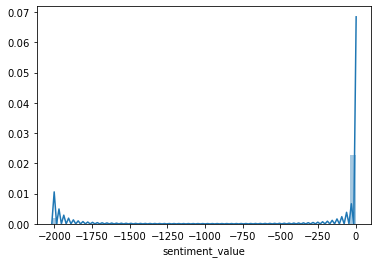

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

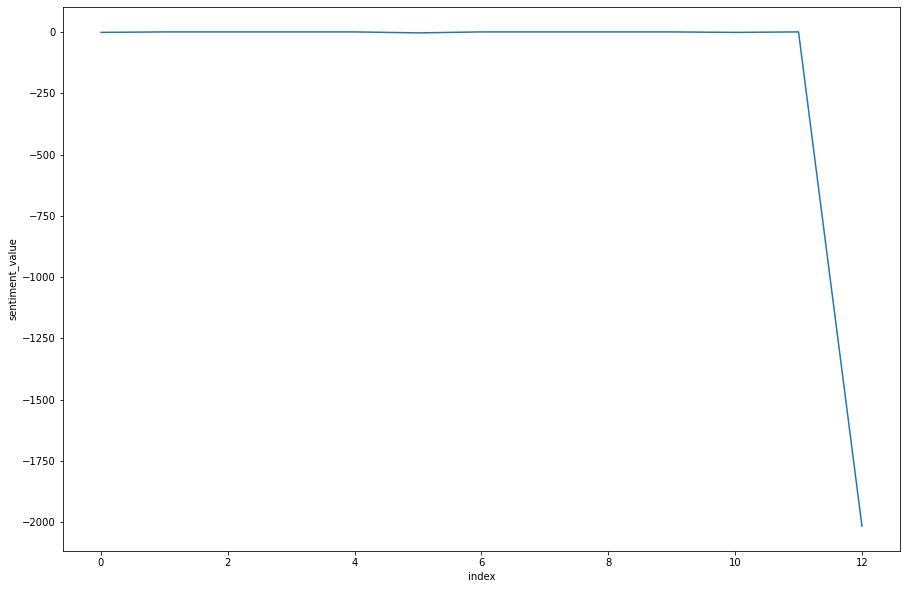

In [38]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

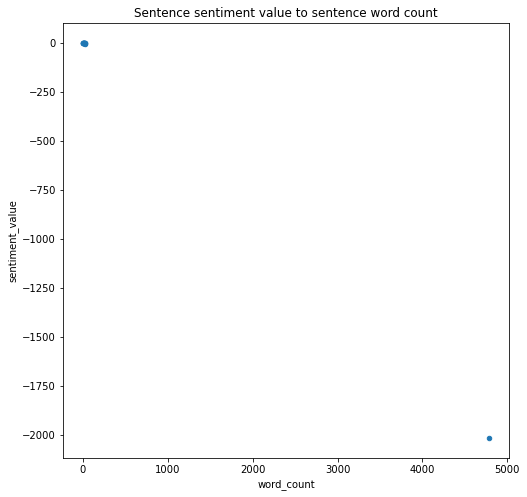

In [39]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [40]:
#Joining the list into one string
text = ' '.join(nega)
text

'; ; Opinion Lexicon: Negative ; ; This file contains a list of NEGATIVE opinion words (or sentiment words). ; ; This file and the papers can all be downloaded from ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ;       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       and Comparing Opinions on the Web." Proceedings of the 14th ; ; Notes: ;    1. The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion. ;       See the paper below: ; ;       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ; ;    2. You will notice many misspelled words in the list. They are not ;       mistakes. They are included as these misspelled words appear ;       frequently in social media content. ; ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; 2-faced 2-faces abnorma

In [41]:
#Punctuation
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'  Opinion Lexicon Negative   This file contains a list of NEGATIVE opinion words or sentiment words   This file and the papers can all be downloaded from     httpwwwcsuiceduliubFBSsentimentanalysishtml      Minqing Hu and Bing Liu Mining and Summarizing Customer Reviews        Proceedings of the ACM SIGKDD International Conference on Knowledge        and Comparing Opinions on the Web Proceedings of the 14th   Notes     1 The appearance of an opinion word in a sentence does not necessarily        mean that the sentence expresses a positive or negative opinion        See the paper below         Bing Liu Sentiment Analysis and Subjectivity An chapter in      2 You will notice many misspelled words in the list They are not        mistakes They are included as these misspelled words appear        frequently in social media content   2faced 2faces abnormal abolish abominable abominably abominate abomination abort aborted aborts abrade abrasive abrupt abruptly abscond absence absentminded ab

In [42]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Opinion', 'Lexicon', 'Negative', 'This', 'file', 'contains', 'a', 'list', 'of', 'NEGATIVE', 'opinion', 'words', 'or', 'sentiment', 'words', 'This', 'file', 'and', 'the', 'papers', 'can', 'all', 'be', 'downloaded', 'from', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'Minqing', 'Hu', 'and', 'Bing', 'Liu', 'Mining', 'and', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'of', 'the', 'ACM', 'SIGKDD', 'International', 'Conference', 'on', 'Knowledge', 'and', 'Comparing', 'Opinions', 'on', 'the']


In [43]:
len(text_tokens)

4902

In [44]:
#Remove stopwords
import nltk 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words ]
print(no_stop_tokens[0:40])

['Opinion', 'Lexicon', 'Negative', 'This', 'file', 'contains', 'list', 'NEGATIVE', 'opinion', 'words', 'sentiment', 'words', 'This', 'file', 'papers', 'downloaded', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'Minqing', 'Hu', 'Bing', 'Liu', 'Mining', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'ACM', 'SIGKDD', 'International', 'Conference', 'Knowledge', 'Comparing', 'Opinions', 'Web', 'Proceedings', '14th', 'Notes', '1', 'The', 'appearance']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#normalize
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['opinion', 'lexicon', 'negative', 'this', 'file', 'contains', 'list', 'negative', 'opinion', 'words', 'sentiment', 'words', 'this', 'file', 'papers', 'downloaded', 'httpwwwcsuiceduliubfbssentimentanalysishtml', 'minqing', 'hu', 'bing', 'liu', 'mining', 'summarizing', 'customer', 'reviews', 'proceedings', 'acm', 'sigkdd', 'international', 'conference', 'knowledge', 'comparing', 'opinions', 'web', 'proceedings', '14th', 'notes', '1', 'the', 'appearance', 'opinion', 'word', 'sentence', 'necessarily', 'mean', 'sentence', 'expresses', 'positive', 'negative', 'opinion', 'see', 'paper', 'bing', 'liu', 'sentiment', 'analysis', 'subjectivity', 'an', 'chapter', '2', 'you', 'notice', 'many', 'misspelled', 'words', 'list', 'they', 'mistakes', 'they', 'included', 'misspelled', 'words', 'appear', 'frequently', 'social', 'media', 'content', '2faced', '2faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 

In [46]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['opinion', 'lexicon', 'neg', 'thi', 'file', 'contain', 'list', 'neg', 'opinion', 'word', 'sentiment', 'word', 'thi', 'file', 'paper', 'download', 'httpwwwcsuiceduliubfbssentimentanalysishtml', 'minq', 'hu', 'bing', 'liu', 'mine', 'summar', 'custom', 'review', 'proceed', 'acm', 'sigkdd', 'intern', 'confer', 'knowledg', 'compar', 'opinion', 'web', 'proceed', '14th', 'note', '1', 'the', 'appear', 'opinion', 'word', 'sentenc', 'necessarili', 'mean', 'sentenc', 'express', 'posit', 'neg', 'opinion', 'see', 'paper', 'bing', 'liu', 'sentiment', 'analysi', 'subject', 'an', 'chapter', '2', 'you', 'notic', 'mani', 'misspel', 'word', 'list', 'they', 'mistak', 'they', 'includ', 'misspel', 'word', 'appear', 'frequent', 'social', 'media', 'content', '2face', '2face', 'abnorm', 'abolish', 'abomin', 'abomin', 'abomin', 'abomin', 'abort', 'abort', 'abort', 'abrad', 'abras', 'abrupt', 'abruptli', 'abscond', 'absenc', 'absentmind', 'absente', 'absurd', 'absurd', 'absurdli', 'absurd', 'abus', 'abus', 'abu

In [47]:
nlp = spacy.load('en_core_web_sm')

In [48]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:60])

Opinion Lexicon Negative This file contains list NEGATIVE opinion words sentiment words This file papers downloaded httpwwwcsuiceduliubFBSsentimentanalysishtml Minqing Hu Bing Liu Mining Summarizing Customer Reviews Proceedings ACM SIGKDD International Conference Knowledge Comparing Opinions Web Proceedings 14th Notes 1 The appearance opinion word sentence necessarily mean sentence expresses positive negative opinion See paper Bing Liu Sentiment Analysis Subjectivity An chapter 2


In [49]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['opinion', 'Lexicon', 'Negative', 'this', 'file', 'contain', 'list', 'negative', 'opinion', 'word', 'sentiment', 'word', 'this', 'file', 'paper', 'download', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'Minqing', 'Hu', 'Bing', 'Liu', 'Mining', 'Summarizing', 'Customer', 'Reviews']


Feature Extraction

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [51]:
print(vectorizer.vocabulary_)

{'opinion': 2694, 'lexicon': 2328, 'negative': 2610, 'this': 3649, 'file': 1387, 'contain': 581, 'list': 2342, 'word': 4098, 'sentiment': 3237, 'paper': 2775, 'download': 1136, 'httpwwwcsuiceduliubfbssentimentanalysishtml': 1743, 'minqing': 2468, 'hu': 1744, 'bing': 289, 'liu': 2346, 'mining': 2467, 'summarizing': 3577, 'customer': 677, 'reviews': 3088, 'proceedings': 2926, 'acm': 38, 'sigkdd': 3303, 'international': 2140, 'conference': 557, 'knowledge': 2266, 'comparing': 531, 'opinions': 2696, 'web': 4068, '14th': 0, 'note': 2637, 'the': 3646, 'appearance': 152, 'sentence': 3236, 'necessarily': 2602, 'mean': 2437, 'express': 1281, 'positive': 2885, 'see': 3215, 'analysis': 102, 'subjectivity': 3546, 'an': 101, 'chapter': 476, 'pron': 2934, 'notice': 2638, 'many': 2424, 'misspelled': 2519, 'mistake': 2522, 'include': 1925, 'misspell': 2518, 'appear': 151, 'frequently': 1473, 'social': 3401, 'medium': 2445, 'content': 589, '2faced': 1, '2faces': 2, 'abnormal': 3, 'abolish': 4, 'abomina

In [52]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100]) 

['admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravation', 'aggression', 'aggressive', 'aggressiveness', 'aggressor', 'aggrieve', 'aggrieved', 'aggrivation', 'aghast', 'agonize', 'agonizingly', 'agony', 'aground', 'ail', 'ailment', 'aimless', 'alarm', 'alarmingly', 'alienate', 'alienated', 'alienation', 'allegation', 'allege', 'allergic', 'allergies', 'allergy', 'aloof', 'altercation', 'ambiguity', 'ambiguous', 'ambivalence', 'ambivalent', 'ambush', 'amiss']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
print(X.toarray().shape) 

(4860, 4136)


Bigrams and Trigrams

In [55]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(nega) 

In [56]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['aches', 'an', 'analysis', 'and', 'anti', 'are', 'awful', 'back', 'bent', 'bing', 'bing liu', 'break', 'broken', 'bull', 'criticism', 'destructive', 'die', 'down', 'drop', 'faced', 'faces', 'farcical', 'fat', 'file', 'hard', 'heavy', 'hell', 'hum', 'humiliation', 'ill', 'in', 'killing', 'known', 'lame', 'layoff', 'list', 'liu', 'long', 'martyrdom', 'misspelled', 'misspelled words', 'mistakes', 'negative', 'negative opinion', 'not', 'object', 'objection', 'objectionable', 'obliterated', 'odor', 'of', 'of the', 'off', 'offence', 'offend', 'offender', 'offending', 'offenses', 'offensive', 'offensively', 'offensiveness', 'officious', 'ominous', 'ominously', 'omission', 'omit', 'on', 'one', 'opinion', 'or', 'out', 'over', 'priced', 'proceedings', 'proceedings of', 'proceedings of the', 'provocative', 'retarded', 'rip', 'screwed', 'second', 'self', 'sentence', 'sentiment', 'sentiment analysis', 'slow', 'social', 'spoon', 'sugar', 'terror', 'the', 'they', 'they are', 'this', 'this file', 'th

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(nega)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['aches', 'acted', 'an', 'analysis', 'and', 'anti', 'are', 'awe', 'awful', 'back', 'balanced', 'bent', 'bing', 'bing liu', 'break', 'broken', 'bull', 'confidence', 'criticism', 'destructive', 'die', 'down', 'drop', 'faced', 'faces', 'farcical', 'fat', 'file', 'flexing', 'hard', 'heavy', 'hell', 'hum', 'humiliation', 'hyped', 'ill', 'in', 'killing', 'known', 'lame', 'layoff', 'list', 'liu', 'long', 'martyrdom', 'misjudgment', 'mislead', 'misleading', 'misleadingly', 'mislike', 'mismanage', 'mispronounce', 'mispronounced', 'mispronounces', 'misread', 'misreading', 'misrepresent', 'misrepresentation', 'miss', 'missed', 'misses', 'misspelled', 'misspelled words', 'misstatement', 'mist', 'mistake', 'mistaken', 'mistakenly', 'mistakes', 'mistified', 'mistress', 'mistrust', 'mistrustful', 'mistrustfully', 'mists', 'misunderstand', 'misunderstanding', 'misunderstandings', 'misunderstood', 'misuse', 'moan', 'mobster', 'mock', 'mocked', 'mockeries', 'mockery', 'mocking', 'mockingly', 'mocks', 'm

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off"); 

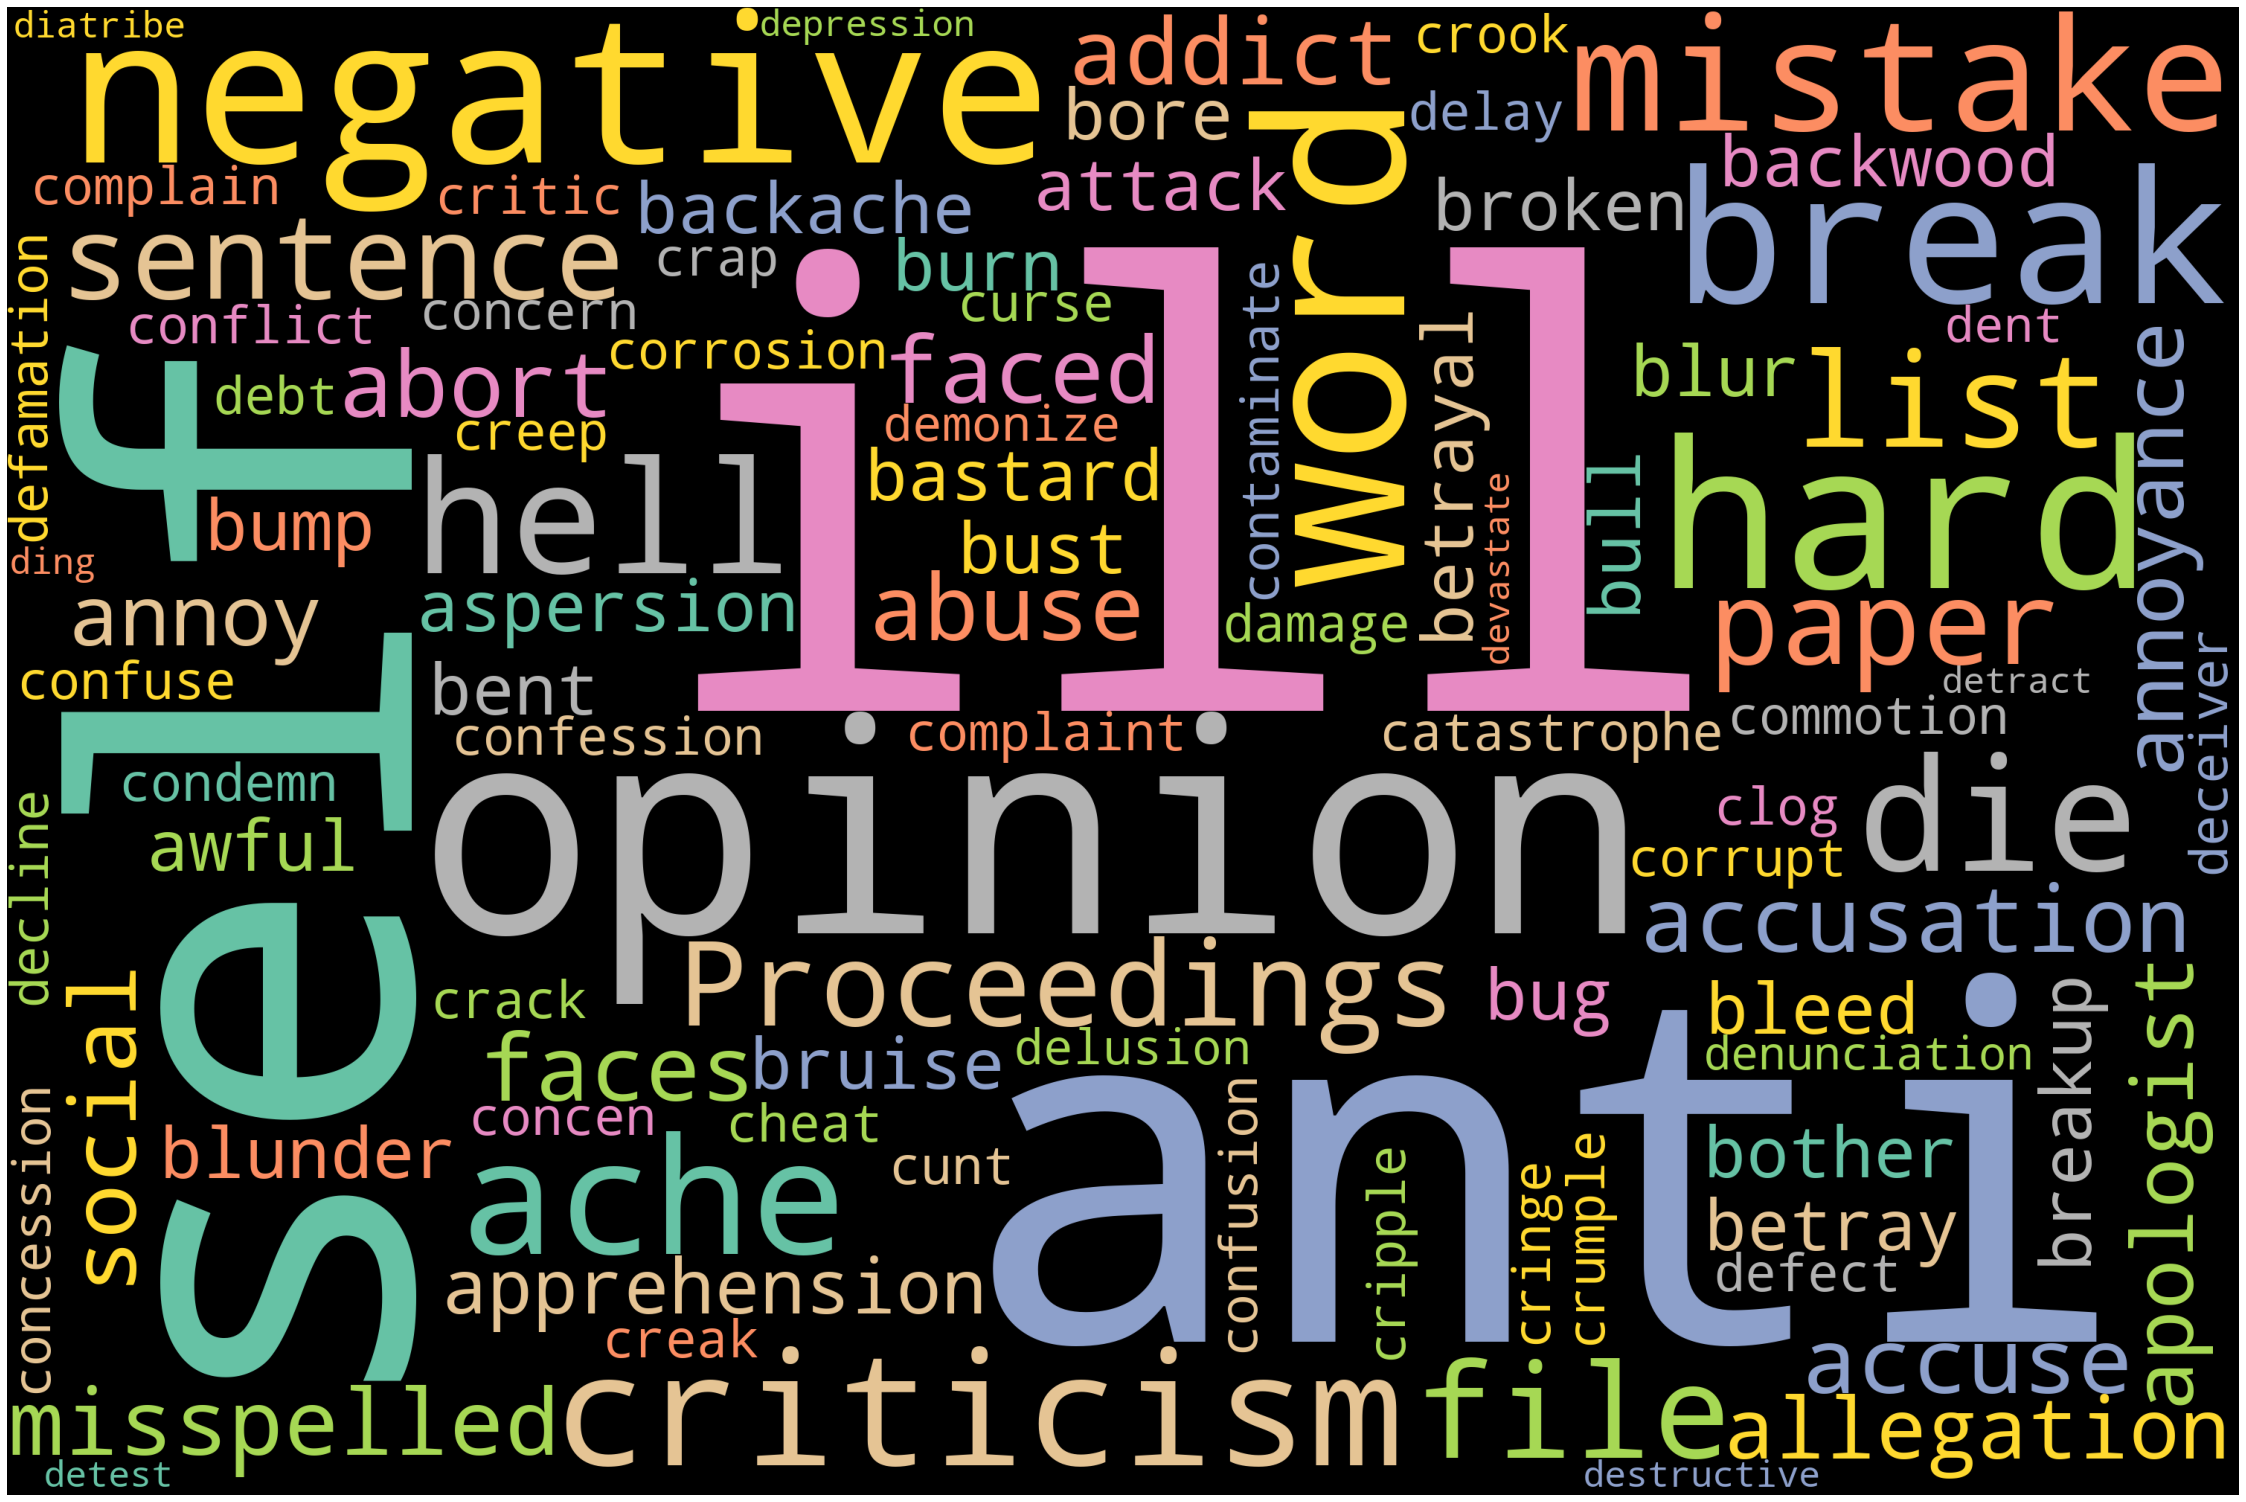

In [60]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)